In [1]:
import os
if not os.path.exists('common.py'):
    print('trying to find project root directory by chaning to parent directory')
    os.chdir('..')
if os.path.exists('common.py'):
    print('all good')
else:
    print('could not find project root directory')

trying to find project root directory by chaning to parent directory
all good


In [2]:
import data1 as data
from sklearn.model_selection import train_test_split

x = data.x
y = data.y.filter(['sphere', 'worm', 'vesicle', 'other'], axis=1).replace(-1, 0)
vesicle = y['vesicle']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=0, stratify=y.other)
len(y_test), sum(y_test.other)

(30, 1)

In [3]:
from models import random_forest_pcc, random_forest_ind

random_forest_pcc.fit(x_train, y_train)
random_forest_ind.fit(x_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(n_estimators=200,
                                                       random_state=RandomState(MT19937) at 0x13134AB40))

In [11]:
y_test.columns[0]

'sphere'

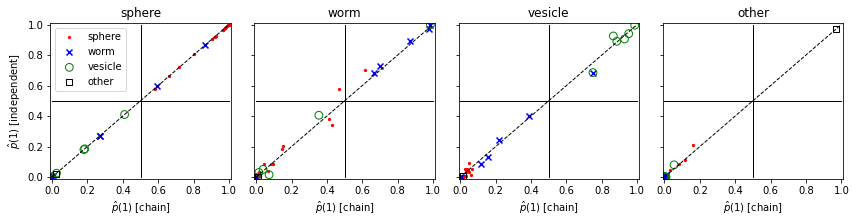

In [15]:
from matplotlib import pyplot as plt
from plotting import scatter_phases

fig, axs = plt.subplots(1, 4, figsize=(12, 3.2), tight_layout=True, sharey=True, sharex=True)

for i in range(4):
    axs[i].plot([0, 1], [0, 1], lw=1, ls='--', color='black')
    axs[i].plot([0, 1], [0.5, 0.5], lw=1, color='black')
    axs[i].plot([0.5, 0.5], [0, 1], lw=1, color='black')
    scatter_phases(y_test, random_forest_pcc.predict_proba(x_test)[:, i], random_forest_ind.predict_proba(x_test)[:, i], ax=axs[i])
    axs[i].set_xlabel(r'$\hat{p}(1)$ [chain]')
    axs[i].set_title(y_test.columns[i])

axs[0].set_ylabel(r'$\hat{p}(1)$ [independent]')
axs[2].set_xlim(-0.01, 1.01)
axs[2].set_ylim(-0.01, 1.01)
axs[0].legend()
plt.show()